In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import IPython.display as display
from IPython.display import clear_output, display

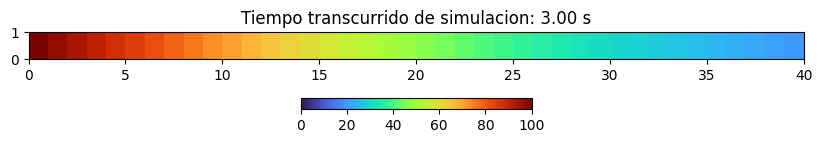

el tiempo que tardo el simulacion en correr es : -68.53 segundos
tiempo: 3.00 s, 
Temperatura promedio: 52.29 °C 

La temperatura por nodo es: 
 [100.    96.93  93.88  90.82  87.81  84.8   81.85  78.9   76.05  73.19
  70.45  67.7   65.09  62.47  60.    57.53  55.21  52.89  50.73  48.58
  46.58  44.58  42.75  40.91  39.22  37.54  35.99  34.45  33.04  31.62
  30.32  29.02  27.8   26.59  25.45  24.32  23.22  22.13  21.07  20.  ] °C


In [ ]:

#Contantes

#como es una simulacion toca buscar un material sobre el cual trabajar en este caso es el Cobre 

alfa = 113 ##mm^2 / s
nodes = 40 

L = 50 #mm

t = 3 #s 

To = 20 # °C


# Diferenciales

dx = L / nodes
dt = 0.5 * dx**2 / alfa  # condicion de estabilidad
t_nodes = int(t / dt)

# temperatira inicial de los nodos

T = np.zeros(nodes) + To

#condiciones de frontera

T[0] = 100 # °C
T[-1] = 20 # °C

#configuracion de la grafica

fig, axis = plt.subplots(figsize = (10,1))
mesh = axis.pcolormesh([T], cmap = "turbo", vmin=0,vmax = 100)
plt.colorbar(mesh, ax=axis, orientation = 'horizontal',pad = 0.5)

# tiempo de inicio real

start_time = time.time()

#simulacion

counter = 0 

while counter < t:
    w = T.copy()
    for i in range(1, nodes - 1):
        T[i] = alfa * ((w[i -1]-2*w[i] + w[i + 1]) / dx**2) * dt + w[i]
    
    counter += dt

    #actualizacion de la grafica
    mesh.set_array(T)
    axis.set_title(f'Tiempo transcurrido de simulacion: {counter:<.2f} s')
    clear_output(wait = True)
    display(fig)


# temperatura individual por nodo

T_per_node = np.round(T,decimals=2)


# cerrar el grafico final

plt.close()

# tiempo real total

end_time = time.time()
print(f"el tiempo que tardo el simulacion en correr es : {start_time - end_time:<.2f} segundos")

#resumen de sultados 

print(f"tiempo: {counter:<.2f} s, \nTemperatura promedio: {np.average(T):<.2f} °C \n" ) 
print(f"La temperatura por nodo es: \n {T_per_node} °C")
